In [1]:
# %matplotlib qt
# %matplotlib
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
# from pathlib import Path
from tueplots import fonts
from pprint import pprint
# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.optimize import minimize
# import json
# import importlib
# import pyperclip
# import os
# import re

# from matplotlib.ticker import MultipleLocator
# from scipy.interpolate import interp1d
from stardata_BD22 import *
# from readmultispec import * #permet de lire les fichiers fits de spectre à échelle
# from wavelen_work import * #permet de traiter les spectres synthétiques et de zoomer sur différentes parties du spectres
from zoom_raies import * #permet de zoomer sur les raies demandées avec les spectres synthétiques demandés
from minimisation_chi_2 import *
 
import pot_exc

# import minimisation_chi_2
repertory_memoire="/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/"
plt.rcParams.update(fonts.neurips2021())

Dispersion is linear
Dispersion is linear
Dispersion is linear
Dispersion is linear


# Mémoire IR

IGRINS Ba/S data. 24 spectres dans bande H (1.5 - 1.75 µm)et K (2.05 - 2.3 µm)

*Correction Sneden : multi-order reduced spectrum in H, wavelengths shifted to air, telluric-corrected with the IGRINS pipeline (that is, by magic, although the spectra look reasonably clean), and with the worst noise spikes removed. mild division of the spectra by one spline continuum fit (IRAF "continuum") so that the top of the spectra are near to 1.0, but certainly not exactly that.* 

# BD-22 1742

### Paramètres stellaires :  
  
Shetye et al. 2018
- Teff = 4000 K  
- L = 775 $L_ⵙ$  
- log g = 1  
- [Fe/H] = -0.3  
- M = 2 $M_ⵙ$  

### Spectre synthétique

Modèle : 4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00

## Spectres

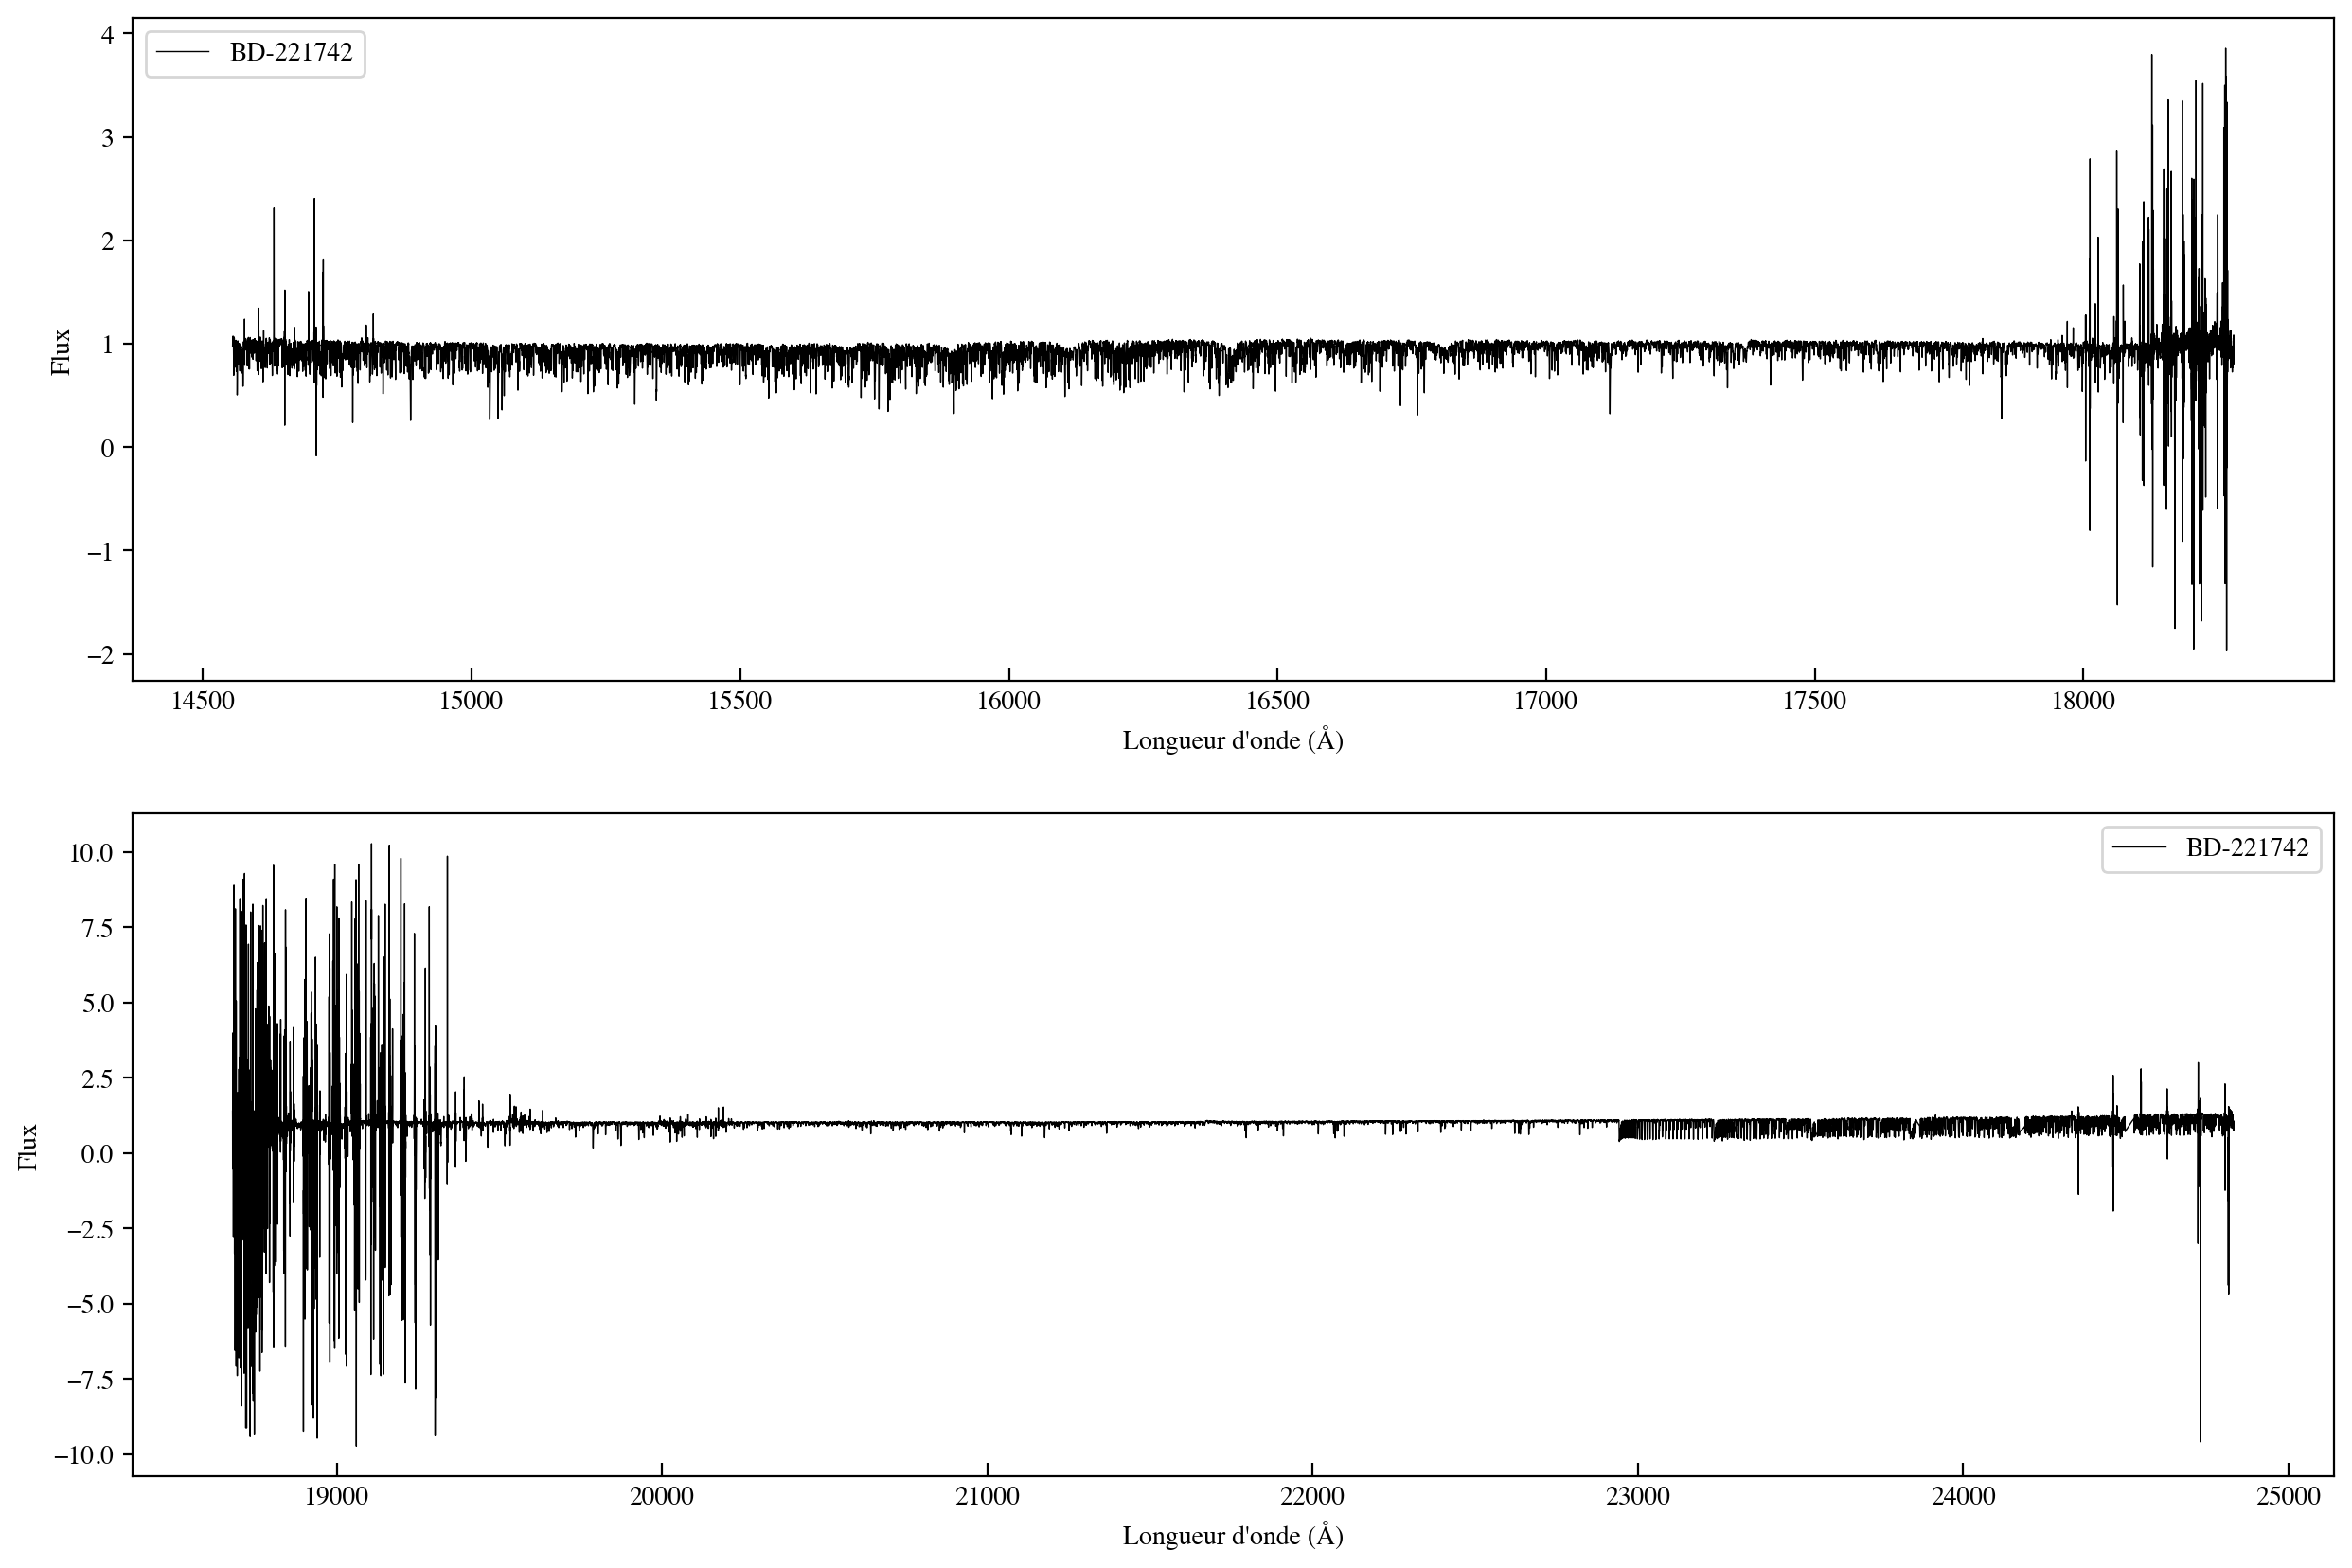

In [2]:
f = plt.figure(figsize=(15, 10), dpi = 200)
gs = f.add_gridspec(2, hspace=0.2)
(ax1, ax2) = gs.subplots(sharex=False, sharey=False)

ax1.plot(stardata.get("wavelen_h"), stardata.get("flux_h"), linewidth=0.5, color = 'black', label = starname)
ax2.plot(stardata.get("wavelen_k"), stardata.get("flux_k"), linewidth=0.5, color = 'black', label = starname)

ax1.legend()
ax2.legend()
# ax1.set_ylim(0.2,1.2)
# ax1.set_xlim(16250,16500)

for ax in f.get_axes():
    ax.set(xlabel="Longueur d'onde (Å)", ylabel="Flux")
    ax.xaxis.set_tick_params(direction = 'in', length = 5, which = 'major')
    ax.xaxis.set_tick_params(direction = 'in', length = 2, which = 'minor')


# plt.rcParams['pgf.texsystem'] = 'pdflatex' 

# plt.savefig('/Users/margauxvandererven/Documents/unif2023-2024/spectre_IR/rapport/figures/graph.pgf')


In [7]:
print(stardata.get("wavelen_h"))
print(stardata.get("flux_h"))
with open("BD-221742_band_H.txt", "w") as f:
    for i in range(len(stardata.get("wavelen_h"))):
        f.write(str(stardata.get("wavelen_h")[i])+" "+str(stardata.get("flux_h")[i])+"\n")

[14555.0, 14555.077498439645, 14555.154996879292, 14555.232495318936, 14555.309993758581, 14555.387492198228, 14555.464990637873, 14555.542489077518, 14555.619987517164, 14555.697485956809, 14555.774984396456, 14555.8524828361, 14555.929981275745, 14556.007479715392, 14556.084978155037, 14556.162476594682, 14556.239975034328, 14556.317473473973, 14556.394971913618, 14556.472470353265, 14556.54996879291, 14556.627467232554, 14556.704965672201, 14556.782464111846, 14556.859962551493, 14556.937460991137, 14557.014959430782, 14557.092457870429, 14557.169956310074, 14557.247454749719, 14557.324953189365, 14557.40245162901, 14557.479950068655, 14557.557448508302, 14557.634946947946, 14557.712445387591, 14557.789943827238, 14557.867442266883, 14557.94494070653, 14558.022439146174, 14558.09993758582, 14558.177436025466, 14558.25493446511, 14558.332432904755, 14558.409931344402, 14558.487429784047, 14558.564928223692, 14558.642426663338, 14558.719925102983, 14558.797423542628, 14558.87492198227

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Exemple de spectre (longueur d'onde et flux)
wavelength = np.linspace(400, 700, 500)  # Longueur d'onde en nm
flux = np.exp(-0.002 * (wavelength - 550) ** 2) + 0.1 * np.random.rand(len(wavelength))  # Spectre avec bruit

# Approximation du continuum avec un filtre de Savitzky-Golay
continuum = savgol_filter(flux, window_length=51, polyorder=3)

# Normalisation du flux
flux_normalized = flux / continuum

# Affichage
plt.figure(figsize=(8, 4))
plt.plot(wavelength, flux, label="Spectre observé", alpha=0.7)
plt.plot(wavelength, continuum, label="Continuum ajusté", linestyle="dashed", color="red")
plt.plot(wavelength, flux_normalized, label="Spectre normalisé", linestyle="dotted", color="green")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Flux normalisé")
plt.legend()
plt.show()

: 

In [6]:
f = plt.figure(figsize=(15, 10), dpi = 200)
gs = f.add_gridspec(2, hspace=0.2)
(ax1, ax2) = gs.subplots(sharex=False, sharey=False)

ax1.plot(stardatab.get("wavelen_h"), stardatab.get("flux_h"), linewidth=0.5, color = 'black', label = starnameb)
ax2.plot(stardatab.get("wavelen_k"), stardatab.get("flux_k"), linewidth=0.5, color = 'black', label = starnameb)

ax1.legend()
ax2.legend()

for ax in f.get_axes():
    ax.set(xlabel="Longueur d'onde (Å)", ylabel="Flux")
    ax.xaxis.set_tick_params(direction = 'in', length = 5, which = 'major')
    ax.xaxis.set_tick_params(direction = 'in', length = 2, which = 'minor')

2025-02-02 15:23:18.075 python[16478:22000790] _TIPropertyValueIsValid called with 16 on nil context!
2025-02-02 15:23:18.075 python[16478:22000790] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-02-02 15:23:18.075 python[16478:22000790] Text input context does not respond to _valueForTIProperty:


## Raies atomiques

In [3]:
pprint(lines_BD22)

{'Ag I': [],
 'Al I': [15956.573,
          15968.18,
          16718.944,
          16750.6435,
          16763.35,
          17699.072,
          17708.09,
          20414.537,
          21093.031499999997,
          21163.756999999998],
 'B I': [],
 'Ba I': [15046.618,
          15621.083,
          15653.163,
          15665.133,
          15677.146499999999,
          15731.241,
          15833.693,
          15836.555,
          15878.785,
          15958.491,
          16007.573,
          16013.806,
          16153.189,
          16231.493,
          16531.77],
 'Ba II': [],
 'Be I': [],
 'Ca I': [15057.099,
          15067.041,
          15478.762,
          16136.823,
          16150.763,
          16155.236,
          16157.364,
          16197.075,
          16204.087,
          17321.541,
          17326.064,
          17558.146,
          18925.496,
          18970.148,
          18970.254,
          19021.734,
          19046.178,
          19115.258,
          19254.697

In [77]:
data=[]
ew_limit= 0.0000001
Teff=4000
with open("/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/Linelists/Sophie_IGRINS/9000-15000_10042024.bsyn","r",encoding="utf8") as file :
        lines = file.readlines()
        for line in lines:
            parts=line.split()
            if len(parts)>3 and "'Th" in parts:
                # print(parts)           
                wavelength = float(parts[0])
                excitation_potential = float(parts[1])
                loggf = float(parts[2])
                ew =  10**(loggf - (5040/Teff)*excitation_potential)
                if ew > ew_limit and wavelength>14500:
                    data.append((wavelength, excitation_potential, ew))
                else:
                     pass
            else:
                 pass
            
with open("/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/Linelists/Sophie_IGRINS/turbo_atoms.20180901_TS2020_transitions_mod_xx_ABO.txt","r",encoding="utf8") as file :
        lines = file.readlines()
        for line in lines:
            parts=line.split()
            # print(parts)
            if len(parts)>3 and "'TH" in parts:
                # print(parts)           
                wavelength = float(parts[0])
                excitation_potential = float(parts[1])
                loggf = float(parts[2])
                ew =  10**(loggf - (5040/Teff)*excitation_potential)
                if ew >ew_limit:
                    data.append((wavelength, excitation_potential, ew*1e3))
                else:
                     pass
            else:
                 pass
            
with open("/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/Linelists/Sophie_IGRINS/17000-25000_10042024.bsyn","r",encoding="utf8") as file :
        lines = file.readlines()
        for line in lines:
            parts=line.split()
            # print(parts)
            if len(parts)>3 and "'Th" in parts:
                # print(parts)           
                wavelength = float(parts[0])
                excitation_potential = float(parts[1])
                loggf = float(parts[2])
                ew =  10**(loggf - (5040/Teff)*excitation_potential)
                if ew >ew_limit:
                    data.append((wavelength, excitation_potential, ew*1e3))
                else:
                     pass
            else:
                 pass
print(data)
wave=[]
for i in data:
     wave.append(i[0])

[]


Nd: 0.0002


In [76]:
pprint(data)
print(wave)

[(14512.206, 5.352, 9.58252586127844e-07),
 (14555.033, 5.385, 6.869102548718842e-07),
 (14565.938, 5.426, 1.808173083336335e-07),
 (14702.962, 5.41, 1.9787913352337382e-07),
 (14719.653, 5.426, 1.1278205406585274e-07),
 (14826.408, 5.308, 5.833376396119346e-07),
 (14956.151, 5.539, 1.1190770774877093e-07),
 (15051.749, 5.351, 0.00028037546056814983),
 (15077.287, 2.176, 0.0001222475038205721),
 (15207.526, 5.385, 0.00019138152020474285),
 (15294.56, 5.308, 0.0006837856777028952),
 (15335.383, 5.41, 0.00011386755619502108),
 (15621.654, 5.539, 0.00019992172942335411),
 (15631.948, 5.351, 0.00016816669924980457),
 (15769.423, 5.539, 0.0001428433411756494),
 (15818.142, 5.587, 0.00016083479135350033),
 (16486.667, 5.828, 0.00013637036408745406),
 (18856.645, 4.076, 0.0009230813998641463),
 (18987.006, 4.143, 0.00048174808836767163),
 (19113.668, 4.186, 0.0003031377340897859),
 (19635.309, 4.956, 0.0001186970703652436),
 (19791.865, 4.913, 0.00014475047581888415),
 (22380.797, 5.033, 0.00

In [67]:
pprint(lines_BD22.get("Ce II"))

[15277.61,
 15784.786,
 15829.83,
 15958.39,
 15977.12,
 16327.32,
 16376.46,
 16595.233,
 16722.6]


In [55]:
10**(-1.4-5040/4000*1.12)

0.0015445429874014218

### Nd

[0.e+00 0.e+00 0.e+00 ... 1.e-06 0.e+00 1.e-06]
[15283.99, 15284.02, 15284.05, 15284.08, 15284.11, 15284.14, 15284.17, 15284.2, 15284.23, 15284.26, 15284.29, 15284.32, 15284.35, 15284.38, 15284.41, 15284.44, 15284.47, 15284.5, 15284.53, 15284.56, 15284.59, 15284.62, 15284.65, 15284.68, 15284.71, 15284.74, 15284.77, 15284.8, 15284.83, 15284.86, 15284.89, 15367.66, 15367.69, 15367.72, 15367.75, 15367.78, 15367.81, 15367.84, 15367.87, 15367.9, 15367.93, 15367.96, 15367.99, 15368.02, 15368.05, 15368.08, 15368.11, 15368.14, 15368.17, 15368.2, 15368.23, 15368.26, 15368.29, 15368.32, 15368.35, 15368.38, 15368.41, 15368.44, 15368.47, 15368.5, 15368.53, 15368.56, 15368.59, 15368.62, 15911.77, 15911.8, 15911.83, 15911.86, 15911.89, 15911.92, 15911.95, 15911.98, 15912.01, 15912.04, 15912.07, 15912.1, 15912.13, 15912.16, 15912.19, 15912.22, 15912.25, 15912.28, 15912.31, 15912.34, 15912.37, 15912.4, 15912.43, 15912.46, 15912.49, 15912.52, 15912.55, 15912.58, 15912.61, 15912.64, 15912.67, 15912.7, 1

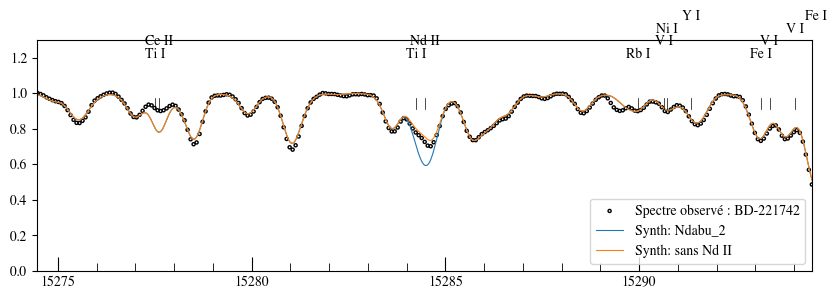

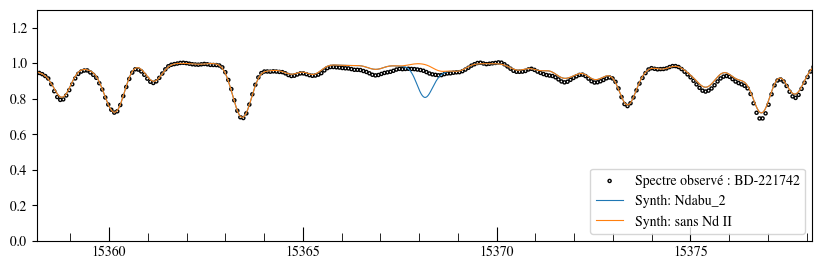

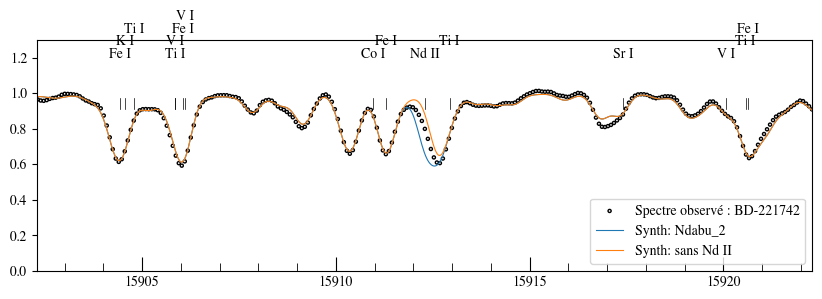

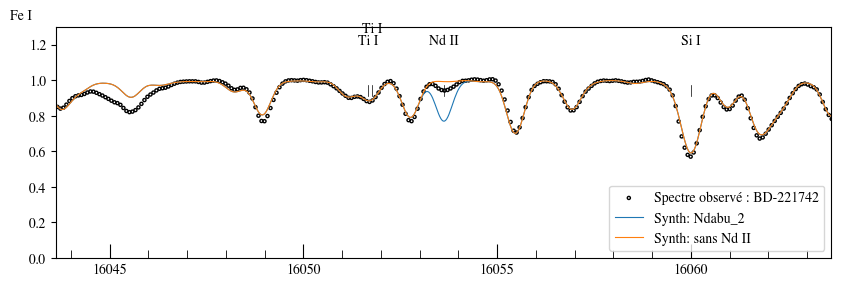

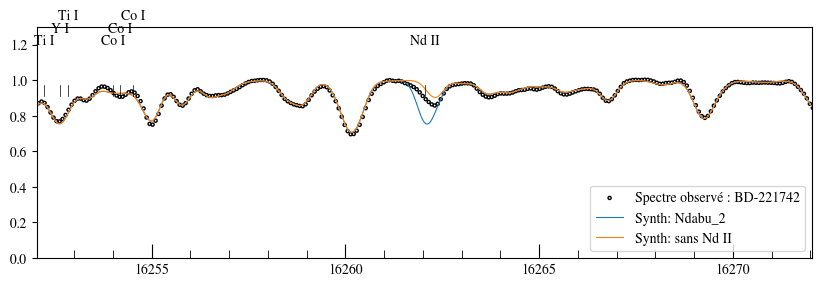

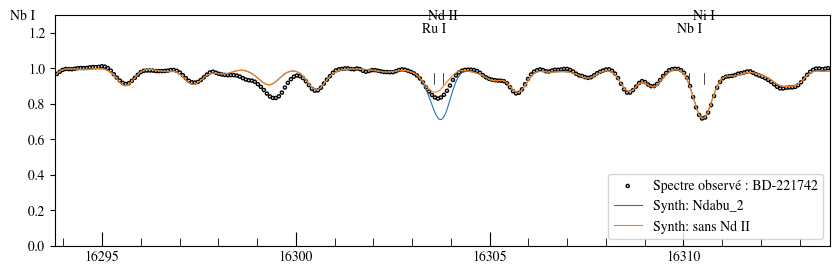

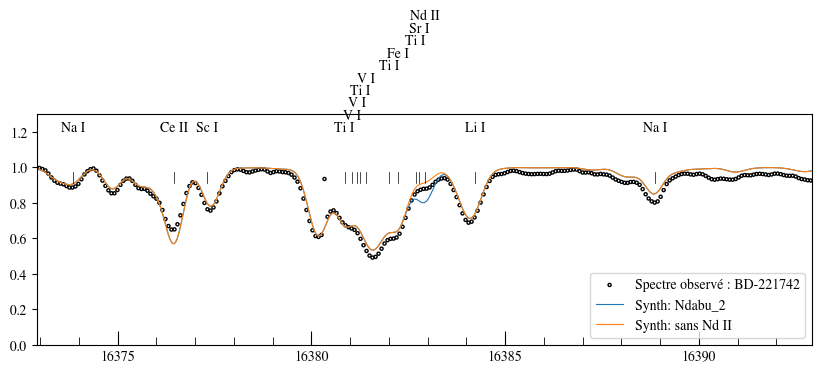

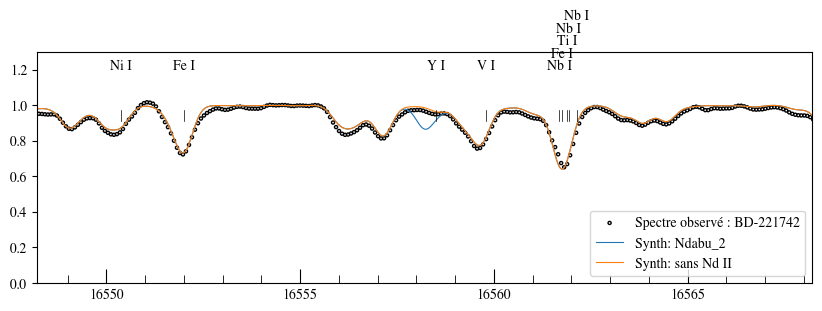

In [50]:
element="Nd II"
avec ="Ndabu_2"
sans ="Ndabu_-20"
fluxA = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_"+avec+".conv")['flux'])
fluxB = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_"+sans+".conv")['flux'])
wavelength = syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_"+avec+".conv")['wavelen']

residu = fluxA - fluxB
print(residu)
raies_ = []
for i in range(len(residu)):
    if abs(residu[i]) > 0.01:
        raies_.append(wavelength[i])
print(raies_)
for i in wave:
    if i < 18000:
        zoom_lines({element:[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_"+avec+".conv":avec,
                                       "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_"+sans+".conv":"sans "+element,
                                       }, stardata, 10,lines_BD22)
pprint(lines_BD22.get(str(element)))

# for i in raies_:
#     zoom_lines({element:[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_"+avec+".conv":avec,
#                                     "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_"+sans+".conv":"sans "+element,
#                                     }, stardata, 10,lines_BD22)

### Zr

In [11]:
for i in lines_BD22.get("Zr I"):
    if i < 18000:
        zoom_lines({"Zr I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_15000-18000_avecZr.conv":"Zrabu=8",
                                       "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_15000-18000_sansZr.conv":"sans Zr",
                                       "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_15000-18000_abuZr_5.conv":"Zrabu=5"}, stardata, 10,lines_BD22)

/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/script/zoom_raies.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(10,y_size))


2025-01-28 21:28:34.636 python[94459:21016073] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


### Ba

In [25]:
fluxA = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_4.0.conv2")['flux'])
fluxB = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_-20.conv2")['flux'])
wavelength = syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_4.0.conv2")['wavelen']

residu = fluxA - fluxB
print(residu)
raies_Ba = []
for i in range(len(residu)):
    if abs(residu[i]) > 0.01:
        raies_Ba.append(wavelength[i])
print(raies_Ba)

[0.e+00 0.e+00 1.e-06 ... 0.e+00 1.e-06 1.e-06]
[22310.83, 22310.86, 22310.89, 22310.92, 22310.95, 22310.98, 22311.01, 22311.04, 22311.07, 22311.1, 22311.13, 22311.16, 22311.19, 22311.22, 22311.25, 22311.28, 22311.31, 22311.34, 22311.37, 22311.4, 22311.43, 22311.46, 22311.49, 22311.52, 22311.55, 22311.58, 22311.61, 22311.64, 22311.67, 22311.7, 22311.73, 22311.76, 22311.79, 22311.82, 22311.85, 22311.88, 22311.91, 22311.94, 22311.97, 22312.0, 22312.03, 22312.06, 22312.09, 22312.12, 22312.15, 22312.18, 22312.21, 22312.24, 22312.27, 22312.3, 22312.33, 23252.89, 23252.92, 23252.95, 23252.98, 23253.01, 23253.04, 23253.07, 23253.1, 23253.13, 23253.16, 23253.19, 23253.22, 23253.25, 23253.28, 23253.31, 23253.34, 23253.37, 23253.4, 23253.43, 23253.46, 23253.49, 23253.52, 23253.55, 23253.58, 23253.61, 23253.64, 23253.67, 23253.7, 23253.73, 23253.76, 23253.79, 23253.82, 23253.85, 23253.88, 23253.91, 23253.94, 23253.97, 23254.0, 23254.03, 23254.06, 23254.09, 23254.12, 23254.15, 23254.18, 23254.21, 

In [21]:
for i in lines_BD22.get("Ba I"):
    if i < 18000:
        zoom_lines({"Ba I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Baabu_4.0.conv":"Baabu=4",
                                       "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Baabu_-20.conv":"sans Ba",
                                       }, stardata, 10,lines_BD22)

/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/script/zoom_raies.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(10,y_size))


In [26]:
for i in raies_Ba:
    zoom_lines({"Ba I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_4.0.conv":"Baabu=4",
                                    "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_-20.conv":"sans Ba",
                                    }, stardata, 10,lines_BD22)

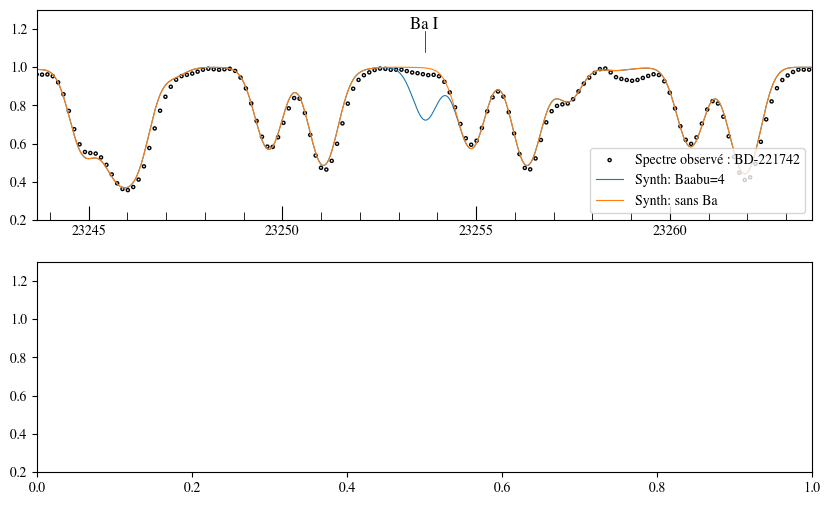

In [54]:
zoom_lines({"Ba I":[23253.67, 22311.62]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_4.0.conv":"Baabu=4",
                                    "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Baabu_-20.conv":"sans Ba",
                                    }, stardata, 10,lines_BD22)

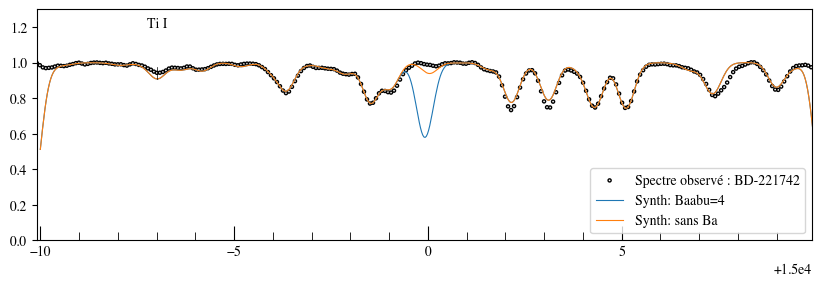

In [58]:
zoom_lines({"Ba I":[14999.917]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14990-15010_Baabu_4.conv":"Baabu=4",
                                    "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14990-15010_Baabu_-20.conv":"sans Ba",
                                    }, stardata, 10,lines_BD22)

### Y

In [4]:
fluxA = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Yabu_8.conv")['flux'])
fluxB = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Yabu_-20.conv")['flux'])
wavelength = syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Yabu_8.conv")['wavelen']

residu = fluxA - fluxB
print(residu)
raies_Y = []
for i in range(len(residu)):
    if abs(residu[i]) > 0.01:
        raies_Y.append(wavelength[i])
print(raies_Y)

[ 0.000658  0.000777  0.000898 ... -0.00035  -0.000309 -0.000271]
[14500.84, 14500.87, 14500.9, 14500.93, 14500.96, 14500.99, 14501.02, 14501.05, 14501.08, 14501.11, 14501.14, 14501.17, 14501.2, 14501.23, 14501.26, 14501.29, 14501.32, 14501.35, 14501.38, 14501.41, 14503.63, 14503.66, 14503.69, 14503.72, 14503.75, 14503.78, 14503.81, 14503.84, 14503.87, 14503.9, 14503.93, 14503.96, 14503.99, 14504.02, 14504.05, 14504.08, 14504.68, 14504.71, 14504.74, 14504.77, 14506.9, 14506.93, 14506.96, 14506.99, 14507.02, 14507.05, 14508.67, 14508.7, 14508.73, 14508.76, 14508.79, 14508.82, 14508.85, 14508.88, 14508.91, 14508.94, 14508.97, 14509.0, 14509.03, 14509.06, 14509.09, 14509.12, 14509.15, 14509.18, 14509.21, 14511.1, 14511.13, 14511.16, 14511.19, 14511.22, 14511.25, 14511.28, 14511.31, 14511.34, 14511.37, 14511.4, 14511.43, 14511.46, 14511.49, 14511.52, 14511.55, 14511.58, 14511.61, 14511.64, 14511.67, 14511.7, 14511.73, 14511.76, 14511.79, 14511.82, 14511.85, 14511.88, 14511.91, 14512.48, 14

In [5]:
for i in lines_BD22.get("Y I"):
    if i < 18000:
        zoom_lines({"Y I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Yabu_8.conv":"Yabu=8",
                                       "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Yabu_-20.conv":"sans Y",
                                       }, stardata, 10,lines_BD22)

/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/script/zoom_raies.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(10,y_size))


2025-02-07 12:21:49.476 python[3968:24736328] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-07 12:21:49.476 python[3968:24736328] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [5]:
print(lines_BD22.get("Y I"))

[14700.035, 14936.959, 15224.826, 15262.303, 15291.332, 15543.845, 15571.856, 15603.919, 15619.927500000002, 15671.989, 15899.621, 16115.969, 16136.49, 16186.543, 16252.635, 16327.395, 16407.667, 16521.801, 16558.511, 16644.497, 16783.0, 16884.863, 17007.344, 17663.291, 17903.234, 17929.881, 17971.141, 18049.812, 18053.75, 18063.445, 18115.295, 18155.432, 18181.764, 18221.055, 18274.547, 18276.883, 18293.65, 18396.992, 18941.861, 19168.574, 19492.898, 19728.121, 19728.361, 19814.875, 20170.207, 20173.488, 20349.543, 21195.852, 21260.449, 21572.391, 21812.562, 22062.643, 22091.436, 22395.195, 22543.836, 22794.777, 23144.463, 23836.785, 24284.227, 24920.896]


In [36]:
for i in raies_Y:
    zoom_lines({"Y I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Yabu_8.conv":"Yabu=8",
                                    "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_19000-24500_Yabu_-20.conv":"sans Y",
                                    }, stardata, 10,lines_BD22)

/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/script/zoom_raies.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(10,y_size))


: 

### Rb

In [9]:
fluxA = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_3.conv")['flux'])
fluxB = np.array(syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_-20.conv")['flux'])
wavelength = syntspec(path+"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_3.conv")['wavelen']

residu = fluxA - fluxB
print(residu)
raies_Rb = []
for i in range(len(residu)):
    if abs(residu[i]) > 0.01:
        raies_Rb.append(wavelength[i])
print(len(raies_Rb))

[0. 0. 0. ... 0. 0. 0.]
27


In [7]:
for i in lines_BD22.get("Rb I"):
    if i < 18000:
        zoom_lines({"Rb I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_3.conv":"Rbabu=3",
                                       "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_-20.conv":"sans Rb",
                                       }, stardata, 10,lines_BD22)

In [10]:
for i in raies_Rb:
    zoom_lines({"Rb I":[i]}, path,{"../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_3.conv":"Yabu=8",
                                    "../../4000g1.0z-0.50m1.0t02a+0.20c+0.346n+0.00o+0.20r+0.00s+0.00.mod_14500-18500_Rbabu_-20.conv":"sans Y",
                                    }, stardata, 10,lines_BD22)

/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/script/zoom_raies.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(10,y_size))


### F

In [3]:
fluxA = np.array(syntspec(path+"tout_OH")['flux'])
fluxB = np.array(syntspec(path+"toutsans_OH")['flux'])
wavelength = syntspec(path+"tout_OH")['wavelen']

residu = fluxA - fluxB
print(residu)

OH = []
for i in range(len(residu)):
    if abs(residu[i]) > 0.1:
        OH.append(wavelength[i])

print(len(OH))

[ 0.0e+00  0.0e+00  0.0e+00 ... -1.4e-05 -1.0e-05 -7.0e-06]
1210


/Users/margauxvandererven/Library/CloudStorage/OneDrive-UniversitéLibredeBruxelles/memoire/script/zoom_raies.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(10,y_size))


2025-02-07 15:43:14.145 python[7933:24852103] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-07 15:43:14.145 python[7933:24852103] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Exemple de données : longueur d'onde (x) et flux (y) simulés
longueur_onde = np.array(syntspec(path+"tout_OH")['wavelen'])
flux = np.array(residu)

# Trouver les minima locaux (pics d'absorption) en inversant le flux
minima, _ = find_peaks(-flux, prominence=0.05)  # prominence=0.05 pour éviter le bruit

# Affichage du spectre
plt.figure(figsize=(8, 5))
plt.plot(longueur_onde, flux, label="Spectre")
plt.plot(longueur_onde[minima], flux[minima], "ro", label="Pics d'absorption")  # Marquer les minima en rouge
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Flux")
plt.xlim(14000,14500)
plt.title("Détection des pics d'absorption")
plt.legend()
plt.show()

# Afficher les longueurs d'onde des pics
print("Longueurs d'onde des pics d'absorption détectés :")
print(longueur_onde[minima])

Longueurs d'onde des pics d'absorption détectés :
[14515.   14559.97 14601.13 14606.74 14610.58 14613.43 14623.   14626.93
 14627.89 14649.1  14661.07 14666.32 14674.78 14693.98 14694.85 14697.91
 14709.07 14736.25 14751.46 14768.29 14779.45 14795.2  14796.37 14829.07
 14860.3  14882.44 14883.64 14904.22 14905.72 14927.74 15002.14 15003.13
 15020.98 15022.84 15051.37 15129.67 15130.93 15145.75 15147.94 15183.04
 15236.8  15264.58 15266.17 15278.53 15281.08 15283.6  15327.88 15372.58
 15391.12 15407.32 15409.18 15419.5  15422.38 15427.48 15428.41 15458.2
 15505.57 15535.45 15536.77 15558.07 15560.23 15565.9  15568.78 15572.08
 15627.37 15651.91 15653.47 15717.1  15719.68 15726.73 15730.45 15755.53
 15756.52 15776.86 15778.87 15828.94 15884.89 15887.83 15892.12 15893.53
 15897.7  15910.45 15912.76 16038.52 16052.77 16061.68 16065.07 16069.48
 16074.16 16075.39 16124.5  16190.08 16204.   16207.18 16216.66 16230.46
 16247.89 16251.64 16255.03 16260.16 16265.71 16312.72 16346.17 16347.49
 1

In [11]:
[14622.16, 14613.49, 14661.08, 14786.86,14796.41, 14882.42, 15130.89, 15278.53, 15281.06,15391.13, 15409.18, 15422.38 ,15428.45, 15429.64, 15505.69, 15568.78, 15651.91, 15719.68, 15755.53, 15756.52, 16052.77, 16247.89, 16255.03, 16312.72, 16347.49, 16368.13, 16448.05, 16526.26, 16662.19, 16729.78, 16904.29, 17069.47, 17073.7, 17096.38, 17104.72, 17239.75, 17322.25, 17413.93, 17423.86, 17531.98, 17607.25, 17610.64, 17618.89, 17772.7, 17773.66, 17818.48,17825.2]

[14622.16,
 14613.49,
 14661.08,
 14786.86,
 14796.41,
 14882.42,
 15130.89,
 15278.53,
 15281.06,
 15391.13,
 15409.18,
 15422.38,
 15428.45,
 15429.64,
 15505.69,
 15568.78,
 15651.91,
 15719.68,
 15755.53,
 15756.52,
 16052.77,
 16247.89,
 16255.03,
 16312.72,
 16347.49,
 16368.13,
 16448.05,
 16526.26,
 16662.19,
 16729.78,
 16904.29,
 17069.47,
 17073.7,
 17096.38,
 17104.72,
 17239.75,
 17322.25,
 17413.93,
 17423.86,
 17531.98,
 17607.25,
 17610.64,
 17618.89,
 17772.7,
 17773.66,
 17818.48,
 17825.2]

In [10]:
for i in longueur_onde[minima][3:]:
    zoom_lines({"OH":[i]}, path,{"tout_OH":"OH",
                                    "toutsans_OH":"pas OH",
                                    }, stardata, 10,lines_BD22)

### Résultats

In [28]:
raies_BD22={
    "Ba I":[23253.67, 22311.62],
    "Y I" : [14943.22, 15230.75, 17663.291,17897.90, 17903.3, 17904.65, 17907.17, 17912.38, 17962.17, 17980.52, 
             19728.121,19819.61,20170.207,20173.488,21260.449,21269.08, 21570.16, 22543.836,23144.463, 23147.96]
}

In [ ]:
# longueurs d'onde des raies de Nandakumar et al. 2024
lines_nandakumar = {
    # "S": [15478.48, 22507.60],
    # "Na": [16373.87 , 16388.85 , 22056.43 , 22083.66  , 23379.14],
    # "Al": [16718.97 ,
    #         16750.60 , 16763.37 , 17699.05 ,
    #  21093.08 , 21163.80 , 21208.18
    # ], 
    # "Zn": [16505.18],
    # "Si": [16434.93, 20804.20 , 20890.37  , 20926.14],
    # "K": [15163.09 , 15168.40],
    # "Ca": [16150.76 , 16155.24 , 16157.36 ,  20962.57 , 20972.53 , 21113.90 , 22607.94 , 22624.96 , 22626.72 , 22651.18 , 22653.58],
    # "Sc": [21730.36 , 21812.24 , 21842.70],
    # "Ti": [16330.54 , 21149.62],
    # "V": [15924.81],
    # "Cr": [15680.06 , 15860.21 , 17708.73 ], 
    # "Mn": [15217.74 , 15262.49],
    # "Co": [16757.64],
    # "Ni": [16310.50 , 16363.09 , 16815.46 , 16818.74 , 16867.28 , 17306.52 , 20957.14 , 21167.93 , 21570.06 , 21945.50 , 22596.93 ],
    "Cu": [16005.64, 16638.98], 
    "Zn": [16505.18],
    "Y": [21260.45 , 22543.84],
    "Ce": [15277.65 , 15829.83 , 15977.12 , 16595.18],
    "Nd": [15368.14 , 16053.63 , 16262.04],
    "Yb": [16498.40],
    # "F": [22699.49 , 22714.59 ,  22778.25 , 22826.86 , 22886.73 , 22957.94],
    # "Mg" : [21059.76, 21060.89, 21458.87]
}

In [ ]:
# longueurs d'onde des raies de Nandakumar et al. 2023 pour le OH, CN, CO

molecular_lines = {
"OH": [
    15236.623,15236.956, 15391.057, 15391.205, 
   #  15469.762, 15470.216, 15505.324, 15505.746, 
    15651.897,
   #  15653.480, 15654.112, 
    16247.884, 
    16312.494, 16312.920, 16346.182, 16347.493, 
   #  16352.213, 
    16581.269,
    
    
   #  16714.359,16872.277, 16886.275, 16886.293, 16895.183, 16895.319, 
   #  16898.778,16902.733, 16909.289
    ],
    
# "CN" : [
#     15466.235, 15471.812, 15485.339, 
#     #     15489.56, 15489.764, 15494.748, 15495.256, 15496.319, 15500.927, 
#     #    15501.498, 15660.700, 15661.595, 
#        15871.453, 
#     #    15881.108, 16021.961, 16179.943, 16180.109, 
#        16329.245, 
#     #  16334.003, 
#      16352.092, 
#     #  16581.908, 16582.026, 16582.199, 16615.321, 16618.553, 16791.783, 
#     #  16895.399
#      ],


#  "CO" : [
#     #    16025.53, 16025.935, 16026.94,
#          16030.941, 16031.274,
#         #    16184.507, 16184.565, 16184.738, 16184.912, 16185.256, 
#         # 16185.548, 16186.062, 16186.473, 16187.154, 16187.688, 16332.817, 16334.087, 
#         16351.905, 16352.478, 
#         # 16613.174,
#         # 16613.225, 16613.427, 16613.579, 16613.984, 16614.236, 16614.846, 16615.195, 16616.012,16616.457, 16617.485,
#         #  16618.021, 16619.264, 16619.887, 16620.177, 16871.668, 16885.696, 16895.397, 16896.04, 16899.304, 16901.802,
#         #  16902.455, 
#         16909.199, 16909.543
#          ],

# "CH" : [20050, 20210, 20350, 20440]


}


In [ ]:
# longueurs d'onde des raies de Nandakumar et al. 2023
raies_atom_Nandakumar={"Fe I":[15485.454, 15490.881,15500.799 ,15501.320, 15502.174,15662.013 ,15878.444 ,16153.247 ,16165.029 , 
                               16171.930 ,16174.975, 16177.085,16179.583,16180.900,16182.170,16185.799,16245.763, 
                               16246.458,16258.912,16316.320,16318.690,16324.451,16331.524,16333.141,16517.223,
                               16612.761,16619.737,16783.037,16792.224,16794.210]}

In [25]:
pprint(lines_BD22.get("Mg I"))
for i in lines_BD22.get("Mg I") : 
    zoom_lines({"Mg I":[i]}, path, 
            {
                # "logg/s4000_g+3.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_15000-15800_BD-221742_logg_3.conv":"log g = 3",
                # "logg/s4000_g+2.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_15000-15800_BD-221742_logg_2.conv":"log g = 2",
                # "logg/s4000_g+1.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_15000-15800_BD-221742_logg_1.conv":"log g = 1",
                # "logg/s4000_g+0.0_m2.0_t02_st_z-0.25_a+0.10_c+0.00_n+0.00_o+0.10_r+0.00_s+0.00.mod_15000-15800_BD-221742_logg_0.conv":"log g = 0",
                }
            , stardata, 10, lines_BD22)

[14877.648,
 14878.19,
 15024.992,
 15040.246,
 15047.705,
 15740.716,
 15748.886,
 15748.988,
 15765.7945,
 17108.631,
 18897.617,
 24818.918,
 24860.547]


In [ ]:
pprint(lines_BD22.get("Al I"))
zoom_lines({"Al I":lines_BD22.get("Al I")[:-3]}, path, {"best_fit":"log $\epsilon_O$ = 8.59 & log $\epsilon_C$ = 7.79 & log $\epsilon_N$ = 8.22 & $v_{macro}$ = 8.6 $km s^{-1}$"}, stardata, 10, lines_BD22)

In [14]:
pprint(lines_BD22.get("Fe I")[220:240])

[22473.264,
 22619.838,
 22740.416,
 22832.363,
 23144.58,
 23164.225,
 23308.477,
 23566.66,
 23683.74,
 23694.85,
 24333.475,
 24374.352,
 24487.668,
 24547.941,
 24556.553,
 24648.422,
 24729.092,
 24923.68]


In [ ]:
raies_atom = {"Fe I": [14745.387,14814.734,14826.408,14897.405,14988.778,15017.7,15077.287,15194.49,
                      15207.526, 15224.729,15294.56,15343.788,15394.673,15395.718,15531.752,15591.49,
                      15604.221,15611.146,15648.51,15723.586,15741.918,15818.142,15821.712,15822.817,
                    #   15904.417,15906.044,15911.302,15964.865,16040.654,16042.716,16125.899,16165.029,
                    #   16180.9,16198.503,16231.646,16284.769,16316.32,16318.691,16324.452,16394.389,16436.621,
                    #   16466.922,16486.667,16506.293,16517.223,16645.874,16753.065,16969.91,17204.297,
                    #   17420.824,17706.615,17721.086,17721.373,17771.123,17932.6,
                    # 19791.865, 19923.344,20281.084,21238.467,22257.107, 22260.18,22392.879,22419.977,22832.363,
                      ]}

In [ ]:
zoom_lines(raies_atom, path, {"best_fit":"log $\epsilon_O$ = 8.59 & log $\epsilon_C$ = 7.79 & log $\epsilon_N$ = 8.22 & $v_{macro}$ = 8.6 $km s^{-1}$"}, stardata, 10, lines_BD22)

In [ ]:
zoom_lines(raies_atom_Nandakumar, path, {"CO_mol/C7.75_O8.59_MAC8.5"  : "log $\epsilon_O$ = 7.75 & log $\epsilon_O$ = 8.59 & $v_{macro}$ = 8.5 $km s^{-1}$"}, stardata, 10, lines_BD22)

In [15]:
for i in lines_BD22.get("Fe I")[220:240]:
    zoom_lines({"FeI":[i]}, path, {"CO_mol/C7.75_O8.59_MAC8.5"  : "log $\epsilon_O$ = 7.75 & log $\epsilon_O$ = 8.59 & $v_{macro}$ = 8.5 $km s^{-1}$"}, stardata, 10, lines_BD22)

In [ ]:
zoom_lines({"FeI":lines_BD22.get("Fe I")[100:160]}, path, {"CO_mol/C7.75_O8.59_MAC8.5"  : "log $\epsilon_O$ = 7.75 & log $\epsilon_O$ = 8.59 & $v_{macro}$ = 8.5 $km s^{-1}$", "tout_sans_Fe":"sans Fe"}, stardata, 10, lines_BD22)

In [ ]:
zoom_lines({"FeI":lines_BD22.get("Fe I")[180:]}, path, {"CO_mol/C7.75_O8.59_MAC8.5"  : "log $\epsilon_O$ = 7.75 & log $\epsilon_O$ = 8.59 & $v_{macro}$ = 8.5 $km s^{-1}$"}, stardata, 10, lines_BD22)

In [ ]:
len(lines_BD22.get("Fe I"))

In [ ]:
zoom_lines({"KI":lines_BD22.get("K I")}, path, {"CO_mol/C7.75_O8.59_MAC8.5"  : "log $\epsilon_O$ = 7.75 & log $\epsilon_O$ = 8.59 & $v_{macro}$ = 8.5 $km s^{-1}$"}, stardata, 10, lines_BD22)

In [ ]:
zoom_lines({"Sc I":[15194.490]}, path, {"K_9.5"  : "log $\epsilon_O$ = 8.56 & $v_{macro}$ = 9.5 $km s^{-1}$","O_8.66"  : "log $\epsilon_O$ = 8.66 & $v_{macro}$ = 9.5 $km s^{-1}$", "sans_OH" : "sansOH"}, stardata, 10, final_filtered_lines_BD22)

In [ ]:
zoom_lines({"Ca":lines_.get("Ca")}, path, {"K_9.5"  : "log $\epsilon_O$ = 8.56 & $v_{macro}$ = 9.5 $km s^{-1}$", "atomic" : "atomic"}, stardata, 10, lines_BD22)

In [ ]:
# final_filtered_lines_BD22.get("Ca I")
# W_lambda.get("Co I")

In [ ]:
zoom_lines(lines_H, path, {"K_9.5"  : "log $\epsilon_O$ = 8.56 & $v_{macro}$ = 9.5 $km s^{-1}$", "atomic" : "atomic"}, stardata, 10)

In [ ]:
for mol in list(molecular_lines.keys()):
        for k in molecular_lines.get(mol):
            # zoom_lines_analyse_ABU_zoom(path, molecules_tout, stardata, "h", k, mol)
            chi_2(path, synthetics, stardata, "h", k, mol)

In [ ]:
# spectres synthétiques
synthetics = {
    "stage/btotal":"MAC:13 & log C : litt & log N : litt & log O: 8,56",
}

molecules_tout = {
    "stage/12C14N":"12C14N",
             "stage/12C16O": "12C16O",
            "13C17O": "13C17O", 
             "stage/13C14N" : "13C14N",
             "16OH": "16OH", 
             "stage/56FeH": "56FeH",
            #   "stage/12CH":"12CH",
            #   "stage/13CH":"13CH",
              "stage/12C12C":"12C12C",
              "stage/12C13C":"12C13C",
            #   "stage/13C13C":"13C13C",
            #   "stage/HF":"HF",
              "H2O":"H2O","atomic_simple_O" : "atomique"
              }


zoom_lines(molecular_lines, path, molecules_tout, stardata, 10)

In [ ]:
grep "Ba"  listederaie.dat | awk '$1 > 14500 && $1 < 15000 {print}' | awk '$4 = 10**($3 - (5040/4000)* $2)' | awk '$4 > 0.00001 && $4 < 1 {printf("%8.3f %8.3f%8.3f %12.8f %s%s\n", $1,$2,$3,$4,$11,$12) }' | sort

# Autre

In [18]:
LTE_visible = syntspec("../LTE.conv")
NLTE_visible = syntspec("../NLTE.conv")

plt.plot(LTE_visible['wavelen'], LTE_visible['flux'])
plt.plot(NLTE_visible['wavelen'], NLTE_visible['flux'])
plt.xlim(4858.5,4861)
# raie en 4859.741

(4858.5, 4861.0)

In [70]:
def get_nearest(x_query, x_vals):
    nearest_index = np.argmin(np.abs(x_vals - x_query))
    return nearest_index

In [ ]:
Fe_line = [
# 4800.507 ,
# 4800.697 ,
# 4801.773 ,
# 4802.523 ,
# 4804.518 ,
4805.098 ,#
# 4805.317 ,
4807.231 ,#ok
# 4808.680 ,
# 4809.933 ,
# 4809.938 ,
# 4811.033 ,
# 4814.370 ,
# 4815.229 ,
4816.667 ,#OK
# 4817.843 ,
# 4821.002 ,
4822.328 ,#ok
4822.559 ,#ok
4822.668 ,#ok
# 4823.229 ,
# 4824.456 ,
4826.620 , #ok
# 4832.037 ,
# 4833.375 ,
# 4838.084 ,
# 4839.769 ,
# 4839.886 ,
# 4841.663 ,
# 4841.785 ,
# 4842.715 ,
# 4843.348 ,
# 4843.386 ,
# 4844.076 ,
# 4844.508 ,
# 4845.655 ,
# 4846.388 ,
# 4847.090 ,
# 4848.202 ,
# 4849.668 ,
# 4854.890 ,
# 4855.541 ,
4856.641 , #ok
# 4858.247 ,
# 4862.538 ,
# 4863.777 ,
# 4868.120 ,
# 4868.448 ,
# 4870.037 ,
# 4870.920 ,
# 4871.049 ,
# 4871.269 ,
4872.691 ,#ok
4872.907 ,#ok
# 4873.120 ,
# 4873.751 ,
# 4875.030 ,
# 4876.186 ,
# 4878.151 ,
# 4880.524 ,
# 4881.733 ,
# 4887.366 ,
# 4890.910 ,
# 4891.049 ,
# 4891.224 ,
# 4893.812 ,
# 4894.562 
]

for i in Fe_line:
    ETL = zoom_syntspec("../", "LTE_.conv", i, 1.5)
    NETL = zoom_syntspec("../", "NLTE.conv", i, 1.5)
    nearest = get_nearest(i, np.array(ETL['synt_wavelen']))
    if ETL['synt_flux'][nearest] > 0.6:
        print(ETL['synt_flux'][nearest])
        f = plt.figure(figsize=(10, 5))
        gs = f.add_gridspec(1)
        ax = gs.subplots(sharex=False, sharey=True)
        ax.plot(ETL['synt_wavelen'], ETL['synt_flux'], label="ETL", linewidth=0.8)
        ax.plot(NETL['synt_wavelen'], NETL['synt_flux'], label="NETL", linewidth=0.8)
        ax.vlines(x=i, ymin=1., ymax=1.1, color='black', linewidth=0.8)
        ax.text(i, 1.15, s="Fe I", color='black', fontsize=10, ha='center')
        ax.set_xlim(i-1.5, i+1.5)
        ax.set_ylim(0., 1.4)
        plt.legend()
        plt.savefig(repertory_memoire+"/output/Fe_visible/raie_plus_faible/Fe"+str(i)+".png", dpi=200)

0.684797
0.613629
0.710396
0.678253
0.704302
0.729495
0.782765
0.781561
0.812871


2024-12-11 17:16:30.527 python[12287:3470874] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-11 17:16:30.527 python[12287:3470874] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-11 17:16:30.527 python[12287:3470874] Text input context does not respond to _valueForTIProperty:
2024-12-11 17:16:35.516 python[12287:3470874] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-11 17:16:35.516 python[12287:3470874] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-11 17:16:35.516 python[12287:3470874] Text input context does not respond to _valueForTIProperty:


In [68]:
Fe_line2 = [4902.233,
4905.218 ,
4907.320 ,
4907.967 ,
4908.031 ,
4908.599 ,
4911.529 ,
4912.498 ,
4913.136 ,
4915.850 ,
4916.664 ,
4917.875 ,
4919.739 ,
4924.301 ,
4924.682 ,
4925.283 ,
4926.409 ,
4927.489 ,
4927.716 ,
4930.053 ,
4932.084 ,
4932.978 ,
4937.293 ,
4937.975 ,
4938.375 ,
4939.600 ,
4952.608 ,
4952.641 ,
4959.198 ,
4961.958 ,
4965.780 ,
4968.276 ,
4968.482 ,
4968.833 ,
4973.903 ,
4975.412 ,
4979.586 ,
4979.721 ,
4979.833 ,
4980.540 ,
4984.604 ,
4984.629 ,
4985.983 ,
4986.903 ,
4987.620 ,
4987.870 ,
4988.353 ,
4991.799 ,
4991.866 ,
4992.785 ,
4993.350 ,
4993.751 ,
4995.408 ,
4995.871 ,
4996.535 ,
4996.769 ,
4997.962 ,
4999.257]

for i in Fe_line2:
    ETL = zoom_syntspec("../", "LTE_2.conv", i, 1.5)
    NETL = zoom_syntspec("../", "NLTE2.conv", i, 1.5)

    f = plt.figure(figsize=(10, 5))
    gs = f.add_gridspec(1)
    ax = gs.subplots(sharex=False, sharey=True)
    ax.plot(ETL['synt_wavelen'], ETL['synt_flux'], label="ETL", linewidth=0.8)
    ax.plot(NETL['synt_wavelen'], NETL['synt_flux'], label="NETL", linewidth=0.8)
    ax.vlines(x=i, ymin=1., ymax=1.1, color='black', linewidth=0.8)
    ax.text(i, 1.15, s="Fe I", color='black', fontsize=10, ha='center')
    ax.set_xlim(i-1.5, i+1.5)
    ax.set_ylim(0., 1.4)
    plt.legend()
    # plt.savefig(repertory_memoire+"/output/Fe_visible/Fe_visible_"+str(i)+".png", dpi=200)

2024-12-11 16:55:59.180 python[12287:3470874] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-11 16:55:59.181 python[12287:3470874] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-11 16:55:59.181 python[12287:3470874] Text input context does not respond to _valueForTIProperty:


In [102]:
faltbo_35 = syntspec("../faltbo-35.conv")
faltbo_46 = syntspec("../faltbo-46.conv")
faltbon_46 = syntspec("../faltbon-46.conv")

plt.figure(figsize=(15, 5))
plt.plot(faltbo_35['wavelen'], faltbo_35['flux'], label="faltbo 35", linewidth=0.8)
plt.plot(faltbo_46['wavelen'], faltbo_46['flux'], label="faltbo 46 ", linewidth=0.8)
plt.plot(faltbon_46['wavelen'], faltbon_46['flux'], label="faltbon 46", linewidth=0.8)
plt.legend()
plt.xlim(15000.5,15009.5)
plt.ylim(0.2,1.1)
plt.savefig(repertory_memoire+"35vs46_conv.png", dpi=200)
# raie en 4859.741

2024-12-11 20:38:58.074 python[12287:3470874] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-11 20:38:58.075 python[12287:3470874] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-11 20:38:58.075 python[12287:3470874] Text input context does not respond to _valueForTIProperty:


In [ ]:
faltbo_35 = syntspec("../faltbo-35.spec")
faltbo_46 = syntspec("../faltbo-46.spec")
faltbon_46 = syntspec("../faltbon-46.spec")

plt.figure(figsize=(15, 5))
plt.plot(faltbo_35['wavelen'], faltbo_35['flux'], label=".spec 35", linewidth=0.8)
plt.plot(faltbo_46['wavelen'], faltbo_46['flux'], label=".spec 46 ", linewidth=0.8)
# plt.plot(faltbon_46['wavelen'], faltbon_46['flux'], label="faltbon 46", linewidth=0.8)
plt.legend()
plt.xlim(15000.5,15009.5)
plt.ylim(0.2,1.1)
plt.savefig(repertory_memoire+"35vs46_spec.png", dpi=200)

2024-12-11 17:49:26.689 python[12287:3470874] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-11 17:49:26.689 python[12287:3470874] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-11 17:49:26.689 python[12287:3470874] Text input context does not respond to _valueForTIProperty:
2024-12-11 17:49:30.171 python[12287:3470874] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-11 17:49:30.171 python[12287:3470874] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-11 17:49:30.171 python[12287:3470874] Text input context does not respond to _valueForTIProperty:


grep "Fe I"  nlte_ges_linelist_jmg04sep2023_I_II | awk '$1 > 4900 && $1 < 5000 {print}' | awk ' $4 = 10**($3 - (5040/4000)* $2)' | awk '$4 > 0.000001 && $4 < 1 {printf("%8.3f %8.3f%8.3f %12.8f %s%s\n", $1,$2,$3,$4,$11,$12) }' | sort

grep "Fe I"  nlte_ges_linelist_jmg04sep2023_I_II | awk '$1 > 4900 && $1 < 5000 {print}' | awk ' $4 = 10**($3 - (5040/4000)* $2)' | awk '$4 > 0.000001 && $4 < 1 {printf("%8.3f \n", $1) }' | sort

In [16]:
pprint(raie_Fe.keys())

dict_keys([14745.387, 14814.734, 14826.408, 14897.405, 14988.778, 15017.7, 15194.49, 15343.788, 15394.673, 15395.718, 15591.49, 15648.51, 15723.586, 15741.918, 15818.142, 15821.712, 15822.817, 15911.302, 15964.865, 16040.654, 16042.716, 16125.899, 16165.029, 16180.9, 16198.503, 16284.769, 16316.32, 16318.691, 16324.452, 16436.621, 16466.922, 16486.667, 16506.293, 16517.223, 16645.874, 17204.297, 17706.615, 17721.086, 17721.373, 17771.123, 17932.6])


In [5]:
test=[14803.159]

for i in test:
    zoom_lines({"Fe I":[i]}, path+"../../", {"s4000_g+1.0_m2.0_t02_st_z-0.22_a+0.09_c+0.00_n+0.00_o+0.09_r+0.00_s+0.00.int_14700-15000-NLTE.conv":"NLTE",
                                             "s4000_g+1.0_m2.0_t02_st_z-0.22_a+0.09_c+0.00_n+0.00_o+0.09_r+0.00_s+0.00.int_14700-15000-LTE.conv":"LTE"},
               stardata, 2, lines_BD22)
    plt.savefig(repertory_memoire+"output/NLTE-LTE-"+str(i)+".png", dpi=400)